In [1]:
%load_ext autoreload
%autoreload 2

import sys, os

sys.argv = ['']
sys.path.append("../")

import dlm

args = dlm.utils.get_parser().parse_args()

Jitting Chamfer 3D
Loaded JIT 3D CUDA chamfer distance


# Parameters

In [2]:
args.activator=["align", 100, "field1", 100, "field2", 100, "field3", 100, "field4", 100, "field5", 100]
args.K = 10
args.batch_size = 64

args.dataset = "modelnet10"
args.train_data = 2
args.test_data = 2

# Loading dataset

Dataset: ModelNetDataset 
train_pre_batch_collate_transform = None
val_pre_batch_collate_transform = None
test_pre_batch_collate_transform = None
pre_transform = Compose([
    NormalizeScale(),
    GridSampling3D(grid_size=0.02, quantize_coords=False, mode=mean),
])
test_transform = Compose([
    FixedPoints(1024, replace=True),
])
train_transform = Compose([
    FixedPoints(1024, replace=True),
])
val_transform = None
inference_transform = Compose([
    NormalizeScale(),
    GridSampling3D(grid_size=0.02, quantize_coords=False, mode=mean),
    FixedPoints(1024, replace=True),
])
Size of train_dataset = 4899
Size of test_dataset = 4899
Size of val_dataset = 0
Batch size = None


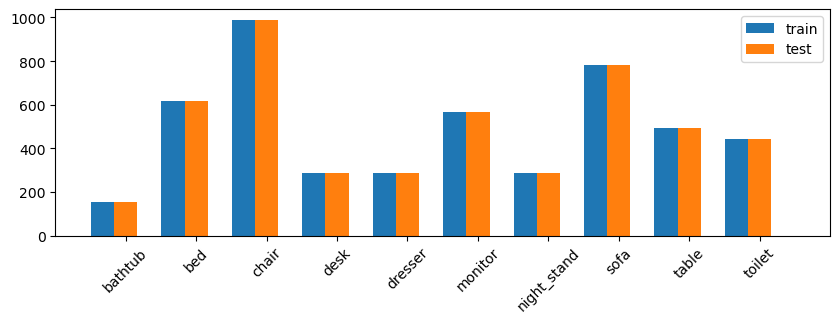

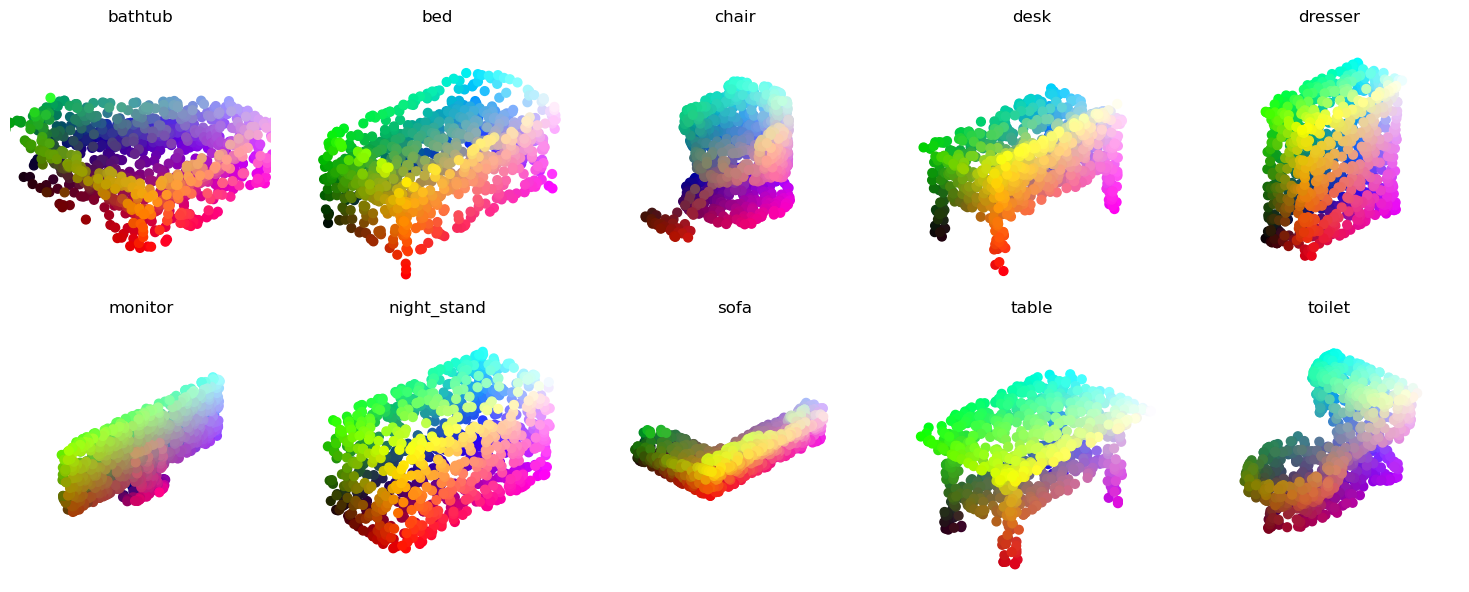

In [3]:
dataset = dlm.datasets.load(args)
dataset.show()

# Cluster initialization

Choose samples from `train_dataset` to initialize prototypes

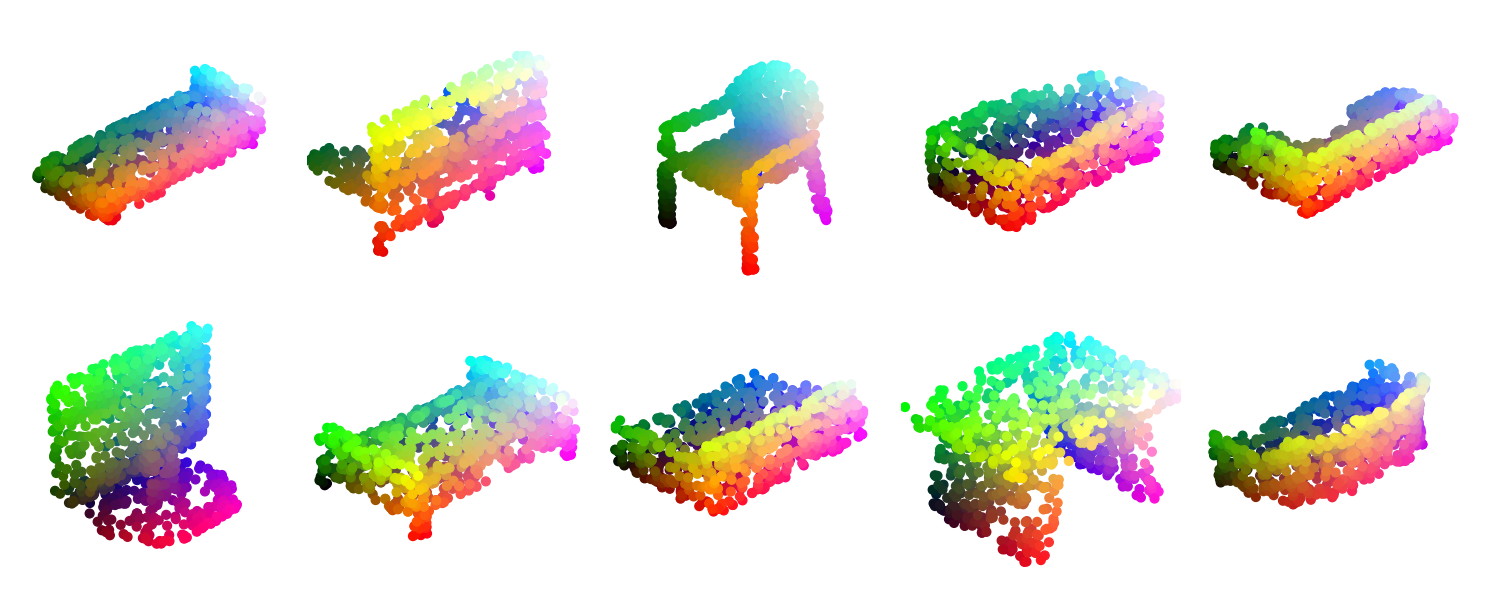

In [4]:
initialisation = dlm.utils.ShapeSampler(args.initialisation, args.K)(dataset.train_dataset)
dlm.viz.print_pc(initialisation)

# Create the model

Model                    DTI3D
PointNetfeat             143104 parameters          requiers gradients: True
LinearShapeModels        13000010.0 parameters      requiers gradients: 93%


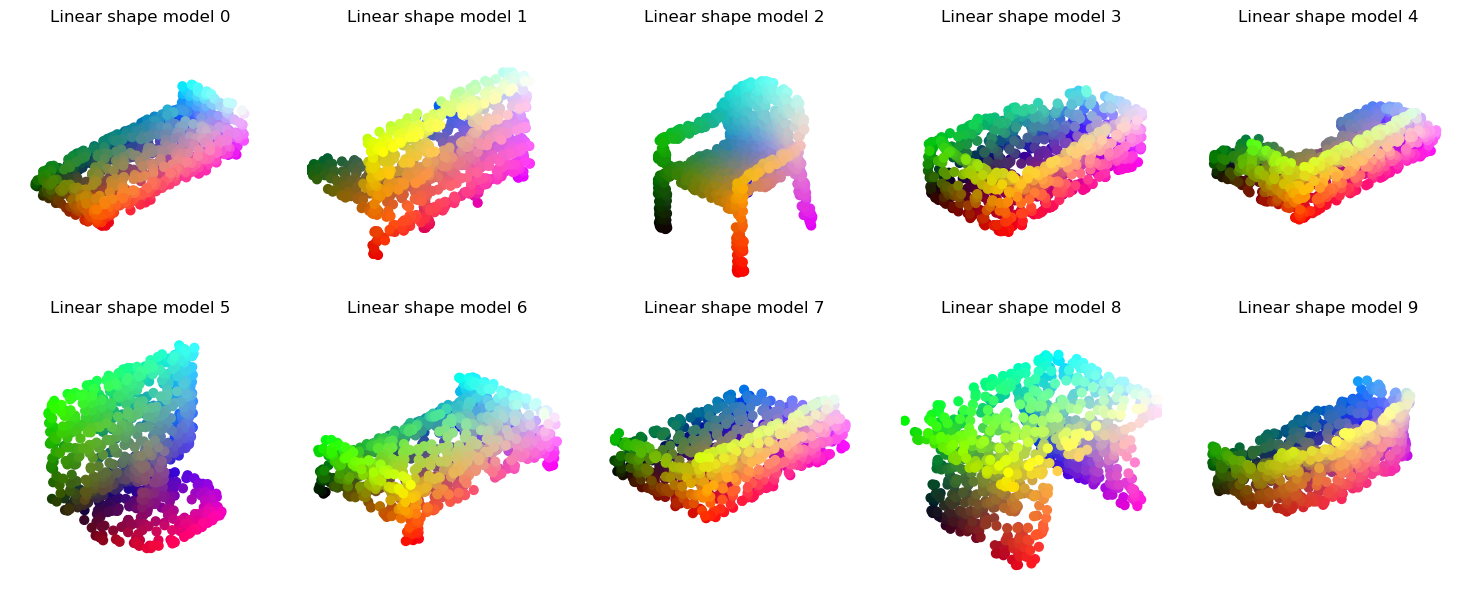

In [5]:
from dlm.models import DTI3D

args.alignment = "Affine"
#args.load = "runs/shapenet_clustering_Affine_3/last_epoch.pt"
model = DTI3D(initialisation, args)
model.describe()
model.show()

# Create the scheduler

With the `auto` setup, the activator will activate the next module in our curriculum strategy order whenever the `total_loss` decreases less than `auto_tol` for `auto_time` epochs.

In [6]:
from dlm.schedulers import ActivatorDTI3D

activator = ActivatorDTI3D(args)

Activator  {'align': 100, 'field1': 100, 'field2': 100, 'field3': 100, 'field4': 100, 'field5': 100}


In [7]:
from dlm.trainers import ClusteringTrainer as BaseClusteringTrainer


#class ClusteringTrainer(BaseClusteringTrainer):
#    def initialize_criterion(self):
#        self.criterion = dlm.losses.AxedChamfer()

trainer = BaseClusteringTrainer(args, name = f"{args.dataset}_clusteringK{args.K}_{args.alignment}")
trainer.initialize_materials(model, dataset, activator)

In [ ]:
trainer.train(2000)

Model                    DTI3D
PointNetfeat             143104 parameters          requiers gradients: True
LinearShapeModels        13000010.0 parameters      requiers gradients: 93%


Epoch:   0%|          | 0/2000 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 1 - Reassigning lsm 1 from lsm 2


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 2 - Reassigning lsm 7 from lsm 2


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Activating align at epoch 101


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 101: warming up encoder to lr=0.000118
Epoch 101: warming up ANet_0 to lr=0.000118
Epoch 101 - Reassigning lsm 4 from lsm 3
Epoch 101 - Reassigning lsm 5 from lsm 7
Epoch 101 - Reassigning lsm 8 from lsm 3


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 102: warming up encoder to lr=0.000137
Epoch 102: warming up ANet_0 to lr=0.000137


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 103: warming up encoder to lr=0.000155
Epoch 103: warming up ANet_0 to lr=0.000155


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 104: warming up encoder to lr=0.000173
Epoch 104: warming up ANet_0 to lr=0.000173


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 105: warming up encoder to lr=0.000192
Epoch 105: warming up ANet_0 to lr=0.000192


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 106: warming up encoder to lr=0.000210
Epoch 106: warming up ANet_0 to lr=0.000210


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 107: warming up encoder to lr=0.000229
Epoch 107: warming up ANet_0 to lr=0.000229


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 108: warming up encoder to lr=0.000247
Epoch 108: warming up ANet_0 to lr=0.000247


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 109: warming up encoder to lr=0.000265
Epoch 109: warming up ANet_0 to lr=0.000265


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 110: warming up encoder to lr=0.000284
Epoch 110: warming up ANet_0 to lr=0.000284


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 111: warming up encoder to lr=0.000302
Epoch 111: warming up ANet_0 to lr=0.000302


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 112: warming up encoder to lr=0.000320
Epoch 112: warming up ANet_0 to lr=0.000320


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 113: warming up encoder to lr=0.000339
Epoch 113: warming up ANet_0 to lr=0.000339


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 114: warming up encoder to lr=0.000357
Epoch 114: warming up ANet_0 to lr=0.000357


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 115: warming up encoder to lr=0.000376
Epoch 115: warming up ANet_0 to lr=0.000376


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 116: warming up encoder to lr=0.000394
Epoch 116: warming up ANet_0 to lr=0.000394


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 117: warming up encoder to lr=0.000412
Epoch 117: warming up ANet_0 to lr=0.000412


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 118: warming up encoder to lr=0.000431
Epoch 118: warming up ANet_0 to lr=0.000431


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 119: warming up encoder to lr=0.000449
Epoch 119: warming up ANet_0 to lr=0.000449


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 120: warming up encoder to lr=0.000467
Epoch 120: warming up ANet_0 to lr=0.000467


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 121: warming up encoder to lr=0.000486
Epoch 121: warming up ANet_0 to lr=0.000486


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 122: warming up encoder to lr=0.000504
Epoch 122: warming up ANet_0 to lr=0.000504


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 123: warming up encoder to lr=0.000522
Epoch 123: warming up ANet_0 to lr=0.000522


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 124: warming up encoder to lr=0.000541
Epoch 124: warming up ANet_0 to lr=0.000541


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 125: warming up encoder to lr=0.000559
Epoch 125: warming up ANet_0 to lr=0.000559


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 126: warming up encoder to lr=0.000578
Epoch 126: warming up ANet_0 to lr=0.000578


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 127: warming up encoder to lr=0.000596
Epoch 127: warming up ANet_0 to lr=0.000596


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 128: warming up encoder to lr=0.000614
Epoch 128: warming up ANet_0 to lr=0.000614


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 129: warming up encoder to lr=0.000633
Epoch 129: warming up ANet_0 to lr=0.000633


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 130: warming up encoder to lr=0.000651
Epoch 130: warming up ANet_0 to lr=0.000651


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 131: warming up encoder to lr=0.000669
Epoch 131: warming up ANet_0 to lr=0.000669


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 132: warming up encoder to lr=0.000688
Epoch 132: warming up ANet_0 to lr=0.000688


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 133: warming up encoder to lr=0.000706
Epoch 133: warming up ANet_0 to lr=0.000706


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 134: warming up encoder to lr=0.000724
Epoch 134: warming up ANet_0 to lr=0.000724


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 135: warming up encoder to lr=0.000743
Epoch 135: warming up ANet_0 to lr=0.000743


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 136: warming up encoder to lr=0.000761
Epoch 136: warming up ANet_0 to lr=0.000761


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 137: warming up encoder to lr=0.000780
Epoch 137: warming up ANet_0 to lr=0.000780


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 138: warming up encoder to lr=0.000798
Epoch 138: warming up ANet_0 to lr=0.000798


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 139: warming up encoder to lr=0.000816
Epoch 139: warming up ANet_0 to lr=0.000816


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 140: warming up encoder to lr=0.000835
Epoch 140: warming up ANet_0 to lr=0.000835


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 141: warming up encoder to lr=0.000853
Epoch 141: warming up ANet_0 to lr=0.000853


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 142: warming up encoder to lr=0.000871
Epoch 142: warming up ANet_0 to lr=0.000871


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 143: warming up encoder to lr=0.000890
Epoch 143: warming up ANet_0 to lr=0.000890


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 144: warming up encoder to lr=0.000908
Epoch 144: warming up ANet_0 to lr=0.000908


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 145: warming up encoder to lr=0.000927
Epoch 145: warming up ANet_0 to lr=0.000927


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 146: warming up encoder to lr=0.000945
Epoch 146: warming up ANet_0 to lr=0.000945


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 147: warming up encoder to lr=0.000963
Epoch 147: warming up ANet_0 to lr=0.000963


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 148: warming up encoder to lr=0.000982
Epoch 148: warming up ANet_0 to lr=0.000982


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 149: warming up encoder to lr=0.001000
Epoch 149: warming up ANet_0 to lr=0.001000


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Activating field1 at epoch 201


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 201: warming up fields_0 to lr=0.000118


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 202: warming up fields_0 to lr=0.000137


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 203: warming up fields_0 to lr=0.000155


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 204: warming up fields_0 to lr=0.000173


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 205: warming up fields_0 to lr=0.000192


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 206: warming up fields_0 to lr=0.000210


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 207: warming up fields_0 to lr=0.000229


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 208: warming up fields_0 to lr=0.000247


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 209: warming up fields_0 to lr=0.000265


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 210: warming up fields_0 to lr=0.000284


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 211: warming up fields_0 to lr=0.000302


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 212: warming up fields_0 to lr=0.000320


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 213: warming up fields_0 to lr=0.000339


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 214: warming up fields_0 to lr=0.000357


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 215: warming up fields_0 to lr=0.000376


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 216: warming up fields_0 to lr=0.000394


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 217: warming up fields_0 to lr=0.000412


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 218: warming up fields_0 to lr=0.000431


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 219: warming up fields_0 to lr=0.000449


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 220: warming up fields_0 to lr=0.000467


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 221: warming up fields_0 to lr=0.000486


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 222: warming up fields_0 to lr=0.000504


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 223: warming up fields_0 to lr=0.000522


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 224: warming up fields_0 to lr=0.000541


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 225: warming up fields_0 to lr=0.000559


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 226: warming up fields_0 to lr=0.000578


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 227: warming up fields_0 to lr=0.000596


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 228: warming up fields_0 to lr=0.000614


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 229: warming up fields_0 to lr=0.000633


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 230: warming up fields_0 to lr=0.000651


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 231: warming up fields_0 to lr=0.000669


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 232: warming up fields_0 to lr=0.000688


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 233: warming up fields_0 to lr=0.000706


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 234: warming up fields_0 to lr=0.000724


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 235: warming up fields_0 to lr=0.000743


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 236: warming up fields_0 to lr=0.000761


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 237: warming up fields_0 to lr=0.000780


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 238: warming up fields_0 to lr=0.000798


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 239: warming up fields_0 to lr=0.000816


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 240: warming up fields_0 to lr=0.000835


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 241: warming up fields_0 to lr=0.000853


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 242: warming up fields_0 to lr=0.000871


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 243: warming up fields_0 to lr=0.000890


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 244: warming up fields_0 to lr=0.000908


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 245: warming up fields_0 to lr=0.000927


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 246: warming up fields_0 to lr=0.000945


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 247: warming up fields_0 to lr=0.000963


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 248: warming up fields_0 to lr=0.000982


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Epoch 249: warming up fields_0 to lr=0.001000


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Activating field2 at epoch 301


Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]

Test:   0%|          | 0/77 [00:00<?, ?it/s]

Train:   0%|          | 0/77 [00:00<?, ?it/s]